In [91]:
#importing the libraies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [92]:
dataset=pd.read_csv("C:/Users\dell\Documents\datasets/Startups_LR.csv")
print(dataset.describe)

<bound method NDFrame.describe of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Flori

In [62]:
#extrating the independent and dependent variable
X=dataset.iloc[:,: -1].values
y=dataset.iloc[:, 4].values

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


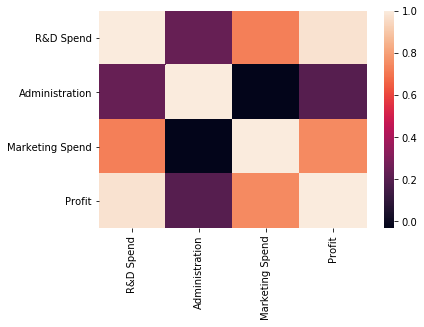

In [63]:
#data visulisation
#buildingthe correlation matrix

sns.heatmap(dataset.corr())

In [64]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
print(X[0])

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [65]:
#avoiding dumpy variable trap
X=X[:,1:]

In [70]:
#splitting the dataset into train &test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=65)

In [71]:
#fitting multiple linear regression model to train set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
#predicting the test set results
y_pred=regressor.predict(X_test)
y_pred

array([ 89830.64048719, 141524.096772  , 131236.41760867,  63492.60663222,
       132270.89213714, 136512.84765996, 109865.87385064,  62429.3977774 ,
        72111.50550196, 132505.95020848])

In [73]:
#calculating the coefficients
print(regressor.coef_)

[3.24630760e-01 2.53816384e-01 2.11990423e+03]


In [74]:
#calculating the intercept
print(regressor.intercept_)

18465.653786935043


In [75]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.70495211287311